# Part II - FordGoBike Data Analysis
## by Ezulu Priscilla Chinwendu




## Investigation Overview
 
> In this investagition, I will provide the needed vizuals between some interesting variables to see there impact on other variables such as the ride duration, ride day, age etc.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It consist of 16 observations and 183412 variables

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('df_clean.csv')

### Ride Duration in Seconds

## (Visualization 1)

>Ride duration has a unimodal distribution with most rides lasting between 300 to 1200 seconds 

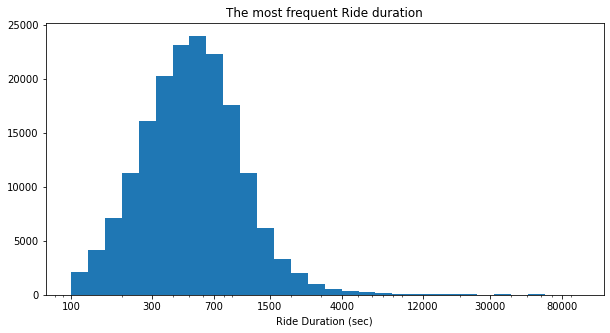

In [3]:
bins = 10 ** np.arange(2, 5.0 + 0.1, 0.1) 
plt.figure(figsize=[10, 5])
plt.hist(data=df_clean, x='duration_sec', bins=bins)
ticks = [100, 300, 700 , 1500, 4000, 12000, 30000, 80000]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Ride Duration (sec)')
plt.title('The most frequent Ride duration')
plt.show();

### Ride Hours
> Majority of the ride took place during rush/peak hours of the day

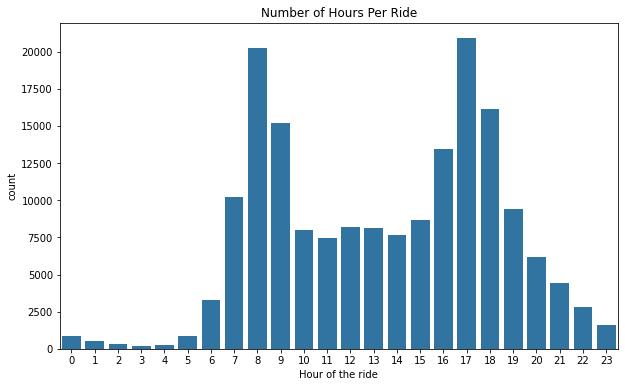

In [4]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(10,6))
sb.countplot(data=df_clean, x='ride_hour', color= base_color);
plt.xlabel('Hour of the ride')
plt.title('Number of Hours Per Ride');


### Ride Days
> It appears users ride more during weekends than week days

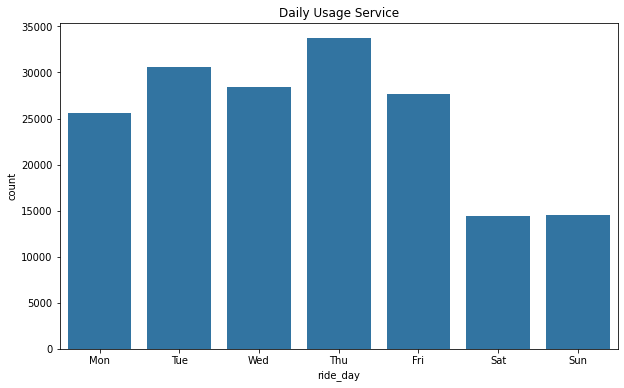

In [5]:
day_order =['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10,6))
sb.countplot(data=df_clean, x='ride_day', order =  day_order, color= base_color)
plt.title('Daily Usage Service');

## (Visualization 2)

### Age and Ride Duration

> There is a negative correlation between duration in seconds and age. As age increases, the ride duration decreases

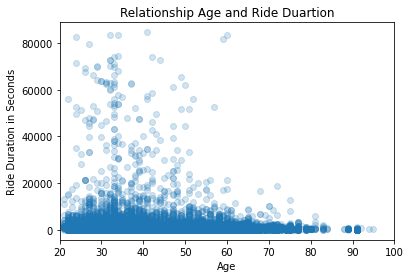

In [6]:
plt.scatter(df_clean['age'], df_clean['duration_sec'], alpha=0.2, color=base_color)
plt.xlim(20, 100)
plt.xlabel('Age')
plt.ylabel('Ride Duration in Seconds')
plt.title('Relationship Age and Ride Duartion');

### Ride Hour by User Type
> Most subscribers and customers ride more in rush hours of the day

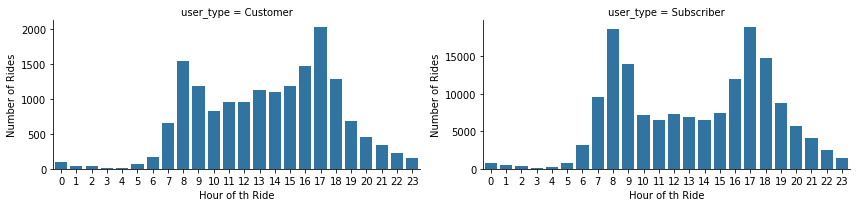

In [7]:
g = sb.FacetGrid(data=df_clean,col='user_type', col_wrap = 2,  aspect=2, sharey=False)
g.map(sb.countplot, 'ride_hour')
for i in range(2):
    g.axes[i].set_xlabel('Hour of th Ride')
    g.axes[i].set_ylabel('Number of Rides')

### Ride days by Gender
> Generally, there is more activity on weekdays than weekends for all the gender types and Thursday appears to be the day with the most rides for all gender.

<Figure size 1080x432 with 0 Axes>

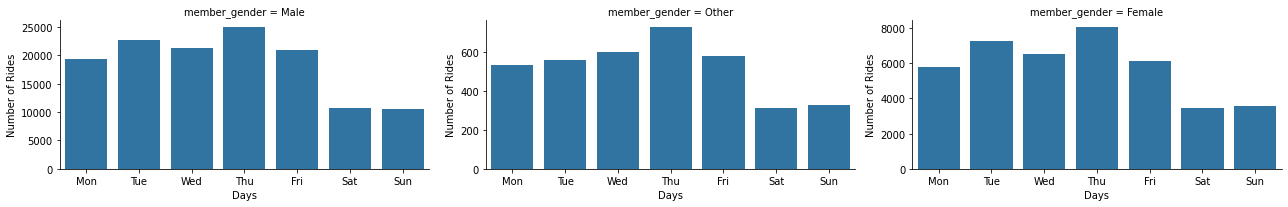

In [8]:
plt.figure(figsize = [15, 6])
g = sb.FacetGrid(data=df_clean,col='member_gender', col_wrap = 3, aspect =2,sharey=False)
g.map(sb.countplot, 'ride_day', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

for i in range(3):
    g.axes[i].set_xlabel('Days')
    g.axes[i].set_ylabel('Number of Rides')

plt.show();

## (Visualization 3)
### Ride days across user types and gender 
> For all gender types, it is clear that subscribers ride more on weekdays than weekends with Thursday being the ride peak day. For the customer user type, the male  and other gender type, they ride more on Thursday and Friday than other days 

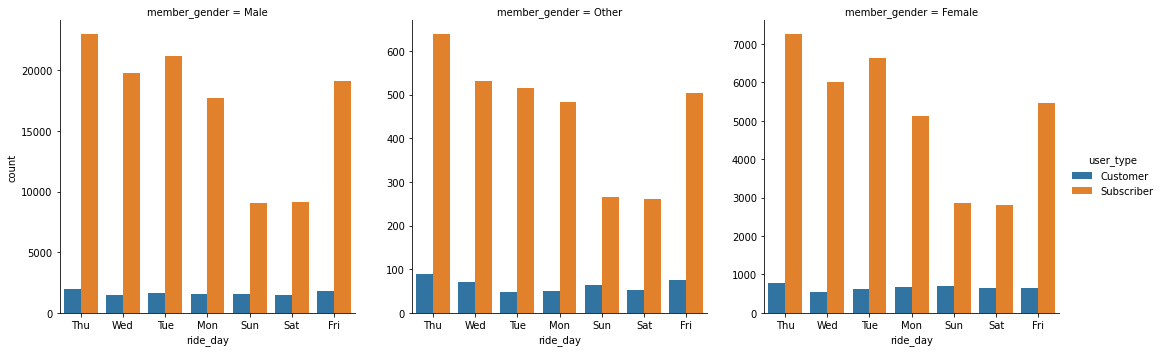

In [9]:
sb.catplot(data=df_clean, x='ride_day', col='member_gender',hue='user_type',kind='count',  sharey=False);

### Ride Duration across  member gender in differnt days
> Other gender tends to have longer trips than male and female gender

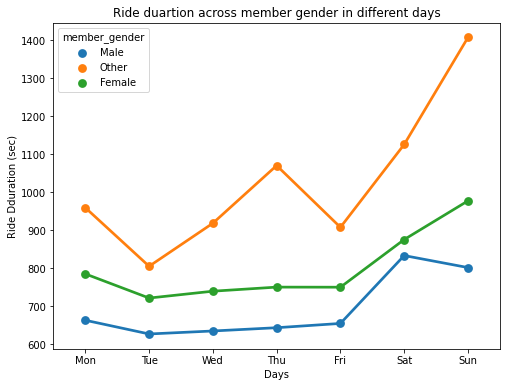

In [11]:
day_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'ride_day', y = 'duration_sec', hue = 'member_gender', order= day_order, ci=None)
plt.title('Ride duartion across member gender in different days')
plt.ylabel('Ride Dduration (sec)')
plt.xlabel('Days')
plt.show();

### Ride Duration across user types in different days
> Customer user type appears to have longer rides than subscribers

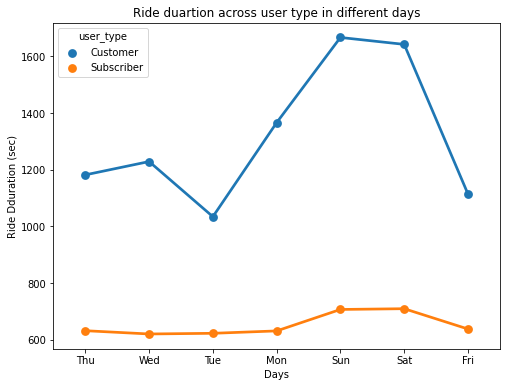

In [12]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'ride_day', y = 'duration_sec', hue = 'user_type', ci=None)
plt.title('Ride duartion across user type in different days')
plt.ylabel('Ride Dduration (sec)')
plt.xlabel('Days')
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 490819 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
